<a href="https://colab.research.google.com/github/jainarpit09/recommendation-system--ML-project/blob/main/steam_video_game_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEAM VIDEO GAMES RECOMMENDATION SYSTEM

we need to recommend the similar games to the user based on their behaviour

#About dataset
This dataset is a list of user behaviors, with columns: user-id, game-title, behavior-name, value. The behaviors included are 'purchase' and 'play'. The value indicates the degree to which the behavior was performed - in the case of 'purchase' the value is always 1, and in the case of 'play' the value represents the number of hours the user has played the game.

steam-200k - (199999, 5)

# Columns in dataset
user-id

game-title

behavior-name

value

0

In [ ]:
# import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Read csv file using pandas

df = pd.read_csv("/content/steam-200k.csv")
df

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0
...,...,...,...,...,...
199994,128470551,Titan Souls,play,1.5,0
199995,128470551,Grand Theft Auto Vice City,purchase,1.0,0
199996,128470551,Grand Theft Auto Vice City,play,1.5,0
199997,128470551,RUSH,purchase,1.0,0


# EDA

In [ ]:
# remane the column name as games user_id, hoursplay and status
df = df.rename(columns = {"151603712" :"user_id","The Elder Scrolls V Skyrim":"games", "purchase" :"status","1.0":"hoursplay"})

In [ ]:
#drop 0 column
df.drop(["0"], axis = 1, inplace = True)
df

,user_id,games,status,hoursplay
0,151603712,The Elder Scrolls V Skyrim,play,273.0
1,151603712,Fallout 4,purchase,1.0
2,151603712,Fallout 4,play,87.0
3,151603712,Spore,purchase,1.0
4,151603712,Spore,play,14.9
...,...,...,...,...
199994,128470551,Titan Souls,play,1.5
199995,128470551,Grand Theft Auto Vice City,purchase,1.0
199996,128470551,Grand Theft Auto Vice City,play,1.5
199997,128470551,RUSH,purchase,1.0


In [ ]:
#drop duplicate user_id and games keep the last one
df = df.drop_duplicates(["user_id","games"], keep = "last")

In [ ]:
#check the shape of the dataset
df.shape

(128804, 4)

In [ ]:
#check columns of the dataset
df.columns

Index(['user_id', 'games', 'status', 'hoursplay'], dtype='object')

In [ ]:
# Check which columns are having categorical, numerical or boolean values of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128804 entries, 0 to 199998
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    128804 non-null  int64  
 1   games      128804 non-null  object 
 2   status     128804 non-null  object 
 3   hoursplay  128804 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.9+ MB


In [ ]:
# Check for missing values in all the columnns of the train_dataset
df.isnull().sum()

user_id      0
games        0
status       0
hoursplay    0
dtype: int64

In [ ]:
# get how many unique values are in games column of dataset
df["games"].value_counts()

Dota 2                              4841
Team Fortress 2                     2323
Unturned                            1563
Counter-Strike Global Offensive     1412
Half-Life 2 Lost Coast               981
                                    ... 
iBomber Attack                         1
The Dreamatorium of Dr. Magnus 2       1
Verde Station                          1
TRIP Steam Edition                     1
Executive Assault                      1
Name: games, Length: 5155, dtype: int64

In [ ]:
# get the total count of play and total count of purchase
total = df.groupby(by = "status")['status'].count()
total

status
play        70205
purchase    58599
Name: status, dtype: int64

In [ ]:
# For more information on the dataset like the total count in all the columns
# min, max values and more information of the respective columns  
df.describe()

,user_id,hoursplay
count,1.288040e+05,128804.000000
mean,1.025343e+08,27.150648
std,7.242875e+07,171.276192
min,5.250000e+03,0.100000
25%,4.559264e+07,1.000000
50%,8.605570e+07,1.000000
75%,1.542307e+08,5.700000
max,3.099031e+08,11754.000000


## visualizing data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f671f2d22e0>,
      dtype=object)

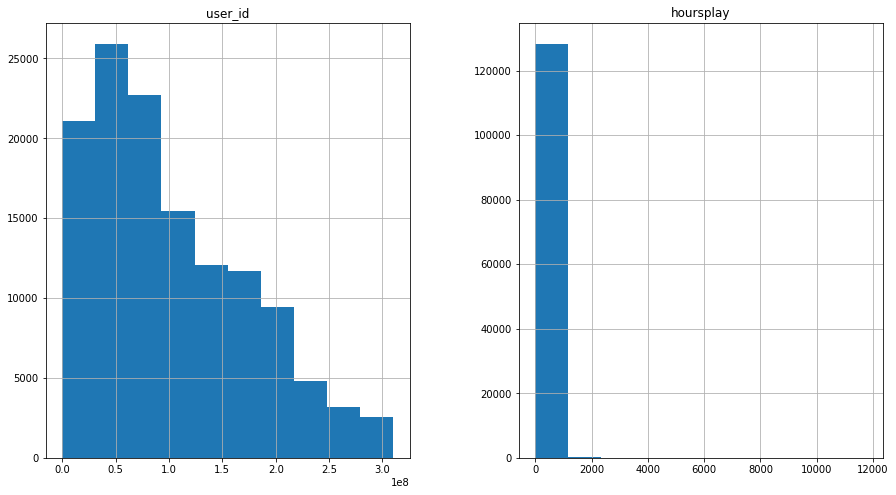

In [ ]:
# Histogram using pandas 
df.hist(figsize = (15,8))

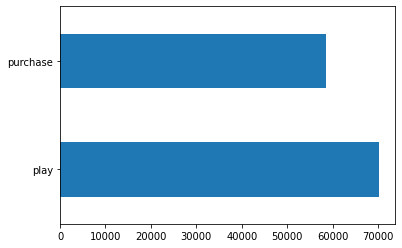

In [ ]:
# plot a horizontal bar plot of column status
df["status"].value_counts().plot.barh()

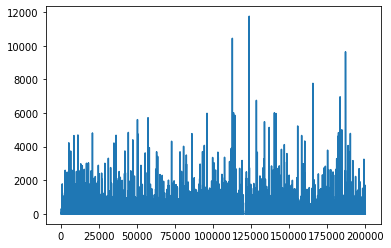

In [ ]:
#plot a count plot of hoursplay column
df["hoursplay"].plot()

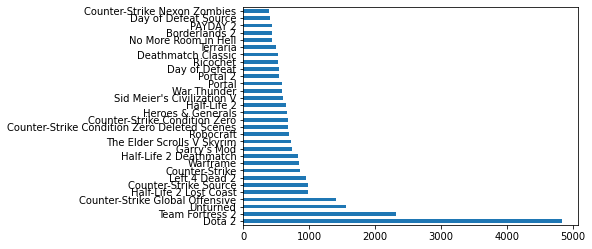

In [ ]:
# plot a horizontal bar plot of games column for top 30 games
df["games"].value_counts().head(30).plot.barh()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


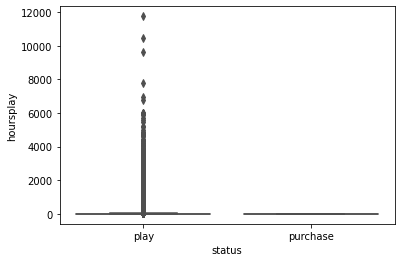

In [ ]:
# plot a boxplot of status as x-axis and hoursplay as y-axis
sns.boxplot(df["status"], df["hoursplay"], palette = 'rainbow')

# converting hours to rating

In [ ]:
# comvert the hoursplay into rating
df = df[df["hoursplay"] >= 2]
df_filtered = df[df.groupby('games').user_id.transform(len) >= 20]
df_filtered['games'].nunique()
df_filtered.head(20)

df_filtered['user_id'] = df_filtered['user_id'].astype(str)
average = df_filtered.groupby(['games'], as_index = False).hoursplay.mean()
average['avg_hoursplay'] = average['hoursplay']
average.drop('hoursplay', axis = 1, inplace = True)

final_rating = pd.merge(df_filtered, average[['games','avg_hoursplay']], on ='games')
conditions = [
    (final_rating['hoursplay']>= 0.8* final_rating['avg_hoursplay']),
    (final_rating['hoursplay']>= 0.6* final_rating['avg_hoursplay']) & (final_rating['hoursplay'] < 0.8* final_rating['avg_hoursplay']),
    (final_rating['hoursplay']>= 0.4* final_rating['avg_hoursplay']) & (final_rating['hoursplay'] < 0.6* final_rating['avg_hoursplay']),
    (final_rating['hoursplay']>= 0.2* final_rating['avg_hoursplay']) & (final_rating['hoursplay'] < 0.4* final_rating['avg_hoursplay']),
    final_rating['hoursplay']>= 0
]

values = [5,4,3,2,1]
final_rating['rating'] = np.select(conditions, values)
final_rating

<ipython-input-18-1fadfbd5f545>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['user_id'] = df_filtered['user_id'].astype(str)


,user_id,games,status,hoursplay,avg_hoursplay,rating
0,151603712,The Elder Scrolls V Skyrim,play,273.0,115.351792,5
1,59945701,The Elder Scrolls V Skyrim,play,58.0,115.351792,3
2,92107940,The Elder Scrolls V Skyrim,play,110.0,115.351792,5
3,250006052,The Elder Scrolls V Skyrim,play,465.0,115.351792,5
4,11373749,The Elder Scrolls V Skyrim,play,220.0,115.351792,5
...,...,...,...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",play,23.0,14.109091,5
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",play,5.5,14.109091,2
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",play,5.8,14.109091,3
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",play,24.0,14.109091,5


In [ ]:
# keep only important columns( user_id, games,rating ) drop everthing else 
df = final_rating[["user_id",'games','rating']]
df

,user_id,games,rating
0,151603712,The Elder Scrolls V Skyrim,5
1,59945701,The Elder Scrolls V Skyrim,3
2,92107940,The Elder Scrolls V Skyrim,5
3,250006052,The Elder Scrolls V Skyrim,5
4,11373749,The Elder Scrolls V Skyrim,5
...,...,...,...
36415,51822361,"Warhammer 40,000 Dawn of War Soulstorm",5
36416,38317154,"Warhammer 40,000 Dawn of War Soulstorm",2
36417,36404933,"Warhammer 40,000 Dawn of War Soulstorm",3
36418,87201181,"Warhammer 40,000 Dawn of War Soulstorm",5


# MEMORY BASED COLLABORATIVE FILTERING

Memory-based algorithms approach the collaborative filtering problem by using the entire database.It tries to find users that are similar to the active user (i.e. the users we want to make predictions for), and uses their preferences to predict ratings for the active user.

In [ ]:
#import pairwise_distances, cosine, corelation
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation



In [ ]:
# create pivot table containing user_id as index, games as columns, ratings as values
df = df.pivot(index= "user_id", columns = "games", values = "rating" ).fillna(0)
df

games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
user_id,,,,,,,,,,,,,,,,,,,,,
100053304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100057229,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100070732,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100096071,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100168166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99766416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99802512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99906508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#check shape of pivot table
df.shape
#check first five rows of pivot table


(8309, 427)

In [ ]:
## Note: As we are subtracting the mean from each rating to standardize
##all users with only one rating or who had rated everything the same will be dropped
# Normalize the values in pivot table
piv_norm  =df.apply(lambda x : (x - np.mean(x))/(np.max(x)-np.min(x)), axis = 1)
piv_norm.fillna(0, inplace = True)
piv_norm= piv_norm.T
piv_norm = piv_norm.loc[:, (piv_norm != 0).any(axis = 0)]

piv_norm
# Drop all columns containing only zeros representing users who did not rate


user_id,100053304,100057229,100070732,100096071,100168166,100208126,100267049,100311267,100322840,100351493,...,99701966,99704390,99711581,99713453,99723205,99766416,99802512,99906508,99940330,99992274
games,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,-0.002342,-0.004684,-0.007026,-0.020609,-0.002342,-0.002342,-0.002342,-0.012178,-0.003747,-0.009836,...,-0.002342,-0.013583,-0.008197,-0.004684,-0.014052,-0.006089,-0.003123,-0.002342,-0.002342,-0.002342
APB Reloaded,-0.002342,-0.004684,-0.007026,-0.020609,-0.002342,-0.002342,-0.002342,-0.012178,-0.003747,-0.009836,...,-0.002342,0.186417,0.491803,-0.004684,-0.014052,-0.006089,-0.003123,-0.002342,-0.002342,-0.002342
ARK Survival Evolved,-0.002342,-0.004684,-0.007026,-0.020609,-0.002342,-0.002342,-0.002342,-0.012178,-0.003747,-0.009836,...,-0.002342,-0.013583,-0.008197,-0.004684,-0.014052,-0.006089,-0.003123,-0.002342,-0.002342,-0.002342
Ace of Spades,-0.002342,-0.004684,-0.007026,-0.020609,-0.002342,-0.002342,-0.002342,-0.012178,-0.003747,-0.009836,...,-0.002342,-0.013583,-0.008197,-0.004684,-0.014052,-0.006089,-0.003123,-0.002342,-0.002342,-0.002342
AdVenture Capitalist,-0.002342,-0.004684,-0.007026,-0.020609,-0.002342,-0.002342,-0.002342,-0.012178,-0.003747,-0.009836,...,-0.002342,-0.013583,-0.008197,-0.004684,-0.014052,-0.006089,-0.003123,-0.002342,-0.002342,-0.002342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worms Reloaded,-0.002342,-0.004684,-0.007026,-0.020609,-0.002342,-0.002342,-0.002342,-0.012178,-0.003747,-0.009836,...,-0.002342,-0.013583,-0.008197,-0.004684,-0.014052,-0.006089,-0.003123,-0.002342,-0.002342,-0.002342
Worms Revolution,-0.002342,-0.004684,-0.007026,-0.020609,-0.002342,-0.002342,-0.002342,-0.012178,-0.003747,-0.009836,...,-0.002342,-0.013583,-0.008197,-0.004684,-0.014052,-0.006089,-0.003123,-0.002342,-0.002342,-0.002342
XCOM Enemy Unknown,-0.002342,-0.004684,-0.007026,-0.020609,-0.002342,-0.002342,-0.002342,-0.012178,-0.003747,-0.009836,...,-0.002342,-0.013583,-0.008197,-0.004684,-0.014052,-0.006089,-0.003123,-0.002342,-0.002342,-0.002342


In [ ]:
# import scipy, operator
import scipy as sp
from sklearn.metrics.pairwise import cosine_similarity
import operator


In [ ]:
# convert the data into sparse matrix format to be read by the following functions

piv_sparse = sp.sparse.csr_matrix(piv_norm.values)
print(piv_sparse)

  (0, 0)	-0.00234192037470726
  (0, 1)	-0.00468384074941452
  (0, 2)	-0.007025761124121779
  (0, 3)	-0.020608899297423888
  (0, 4)	-0.00234192037470726
  (0, 5)	-0.00234192037470726
  (0, 6)	-0.00234192037470726
  (0, 7)	-0.012177985948477752
  (0, 8)	-0.003747072599531616
  (0, 9)	-0.009836065573770491
  (0, 10)	-0.00234192037470726
  (0, 11)	-0.007494145199063232
  (0, 12)	-0.00351288056206089
  (0, 13)	-0.004215456674473068
  (0, 14)	-0.00234192037470726
  (0, 15)	-0.03840749414519906
  (0, 16)	-0.00234192037470726
  (0, 17)	-0.005620608899297424
  (0, 18)	-0.012177985948477752
  (0, 19)	-0.00234192037470726
  (0, 20)	-0.012177985948477752
  (0, 21)	-0.00234192037470726
  (0, 22)	-0.01327088212334114
  (0, 23)	-0.00234192037470726
  (0, 24)	-0.0117096018735363
  :	:
  (426, 8284)	-0.002927400468384075
  (426, 8285)	-0.00234192037470726
  (426, 8286)	-0.00936768149882904
  (426, 8287)	-0.007494145199063232
  (426, 8288)	-0.0927400468384075
  (426, 8289)	-0.003278688524590164
  (426, 

In [ ]:
# create matrices to show the computed cosine similarity values between each user/user array pair and item/item array pair.
item_similarity = cosine_similarity(piv_sparse)
user_similarity = cosine_similarity(piv_sparse.T)


In [ ]:
# Inserting the similarity matricies into dataframe objects
item_df = pd.DataFrame(item_similarity,  index = piv_norm.index,  columns = piv_norm.index)
#item similarity dataframe
user_df = pd.DataFrame(user_similarity, index = piv_norm.columns, columns = piv_norm.columns)
#user similarity dataframe
item_df


games,7 Days to Die,APB Reloaded,ARK Survival Evolved,Ace of Spades,AdVenture Capitalist,Aftermath,Age of Chivalry,Age of Empires II HD Edition,Age of Empires III Complete Collection,Age of Mythology Extended Edition,...,"Warhammer 40,000 Dawn of War II - Chaos Rising","Warhammer 40,000 Space Marine",Wasteland 2,Watch_Dogs,Wolfenstein The New Order,Worms Reloaded,Worms Revolution,XCOM Enemy Unknown,Zombie Panic Source,theHunter
games,,,,,,,,,,,,,,,,,,,,,
7 Days to Die,1.000000,-0.007543,0.060891,0.002966,0.027936,0.066040,0.008533,0.024783,0.001826,-0.004811,...,0.038462,-0.032007,0.088064,0.044466,-0.004337,0.047940,-0.013415,-0.045799,0.012094,0.058805
APB Reloaded,-0.007543,1.000000,0.001937,0.005529,0.074735,0.049272,0.015484,-0.030274,-0.004804,0.037183,...,-0.007941,-0.014501,-0.011241,-0.026646,-0.019086,0.010648,0.020091,-0.078283,0.032655,0.109922
ARK Survival Evolved,0.060891,0.001937,1.000000,-0.011253,-0.026500,-0.033518,-0.010898,-0.010733,-0.016810,-0.018650,...,0.005133,-0.031112,0.009018,0.001191,-0.055410,-0.046589,-0.042405,-0.003724,-0.030652,0.027266
Ace of Spades,0.002966,0.005529,-0.011253,1.000000,0.025053,0.030164,0.048142,0.005576,-0.011961,0.004700,...,-0.004330,-0.010341,-0.012820,-0.027240,-0.040281,-0.009257,0.061875,-0.070280,0.029003,0.041818
AdVenture Capitalist,0.027936,0.074735,-0.026500,0.025053,1.000000,0.032227,0.005420,0.017554,0.014575,0.002911,...,-0.023500,-0.021180,-0.011521,-0.023170,-0.030464,-0.011746,-0.014775,-0.050446,0.015647,0.060270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worms Reloaded,0.047940,0.010648,-0.046589,-0.009257,-0.011746,0.046499,0.018848,-0.002559,0.045562,0.010222,...,-0.019065,0.026953,-0.005609,0.083651,0.005932,1.000000,0.004793,-0.090154,0.038944,0.018386
Worms Revolution,-0.013415,0.020091,-0.042405,0.061875,-0.014775,0.025506,0.019791,0.010603,-0.017944,0.072066,...,0.056026,0.002392,-0.001379,0.009547,-0.041975,0.004793,1.000000,0.035945,0.026535,0.004132
XCOM Enemy Unknown,-0.045799,-0.078283,-0.003724,-0.070280,-0.050446,-0.098052,-0.074917,-0.029132,-0.045017,-0.052410,...,0.032830,0.025662,0.044700,0.009001,0.031897,-0.090154,0.035945,1.000000,-0.048963,-0.090011


In [ ]:
# write a function which will return the top 10 games with the highest cosine similarity value
def top_game(game):
  count = 1
  print("Similar games to {} include:\n" .format(game))
  for item in item_df.sort_values(by = game, ascending = False).index[1:11]:
    print('No. {}: {}'.format(count, item))
    count += 1


In [ ]:
piv_norm.columns

Index(['100053304', '100057229', '100070732', '100096071', '100168166',
       '100208126', '100267049', '100311267', '100322840', '100351493',
       ...
       '99701966', '99704390', '99711581', '99713453', '99723205', '99766416',
       '99802512', '99906508', '99940330', '99992274'],
      dtype='object', name='user_id', length=8309)

In [ ]:
# check the column of pivot table
top_game('Aftermath')

Similar games to Aftermath include:

No. 1: Infestation Survivor Stories
No. 2: WAKFU
No. 3: Baldur's Gate Enhanced Edition
No. 4: America's Army Proving Grounds
No. 5: FINAL FANTASY XIV A Realm Reborn
No. 6: Alice Madness Returns
No. 7: Sakura Clicker
No. 8: RaceRoom Racing Experience 
No. 9: Broforce
No. 10: Supreme Commander Forged Alliance


In [ ]:
# write a function which will return the top 5 users with the highest similarity value 
def top_users(user):

  if user not in piv_norm.columns:
    return ('No data available on user {}' .format(user))
  print('Most Similar Users:\n')
  sim_values = user_df.sort_values(by = user, ascending = False).loc[:, user].tolist()[1:11]
  sim_users = user_df.sort_values(by = user, ascending = False).index[1:11]
  zipped = zip(sim_users, sim_values,)
  for user, sim in zipped:
    print("user #{0}, similarity values : {1:.2f}".format(user, sim))

In [ ]:
top_users('99484728')

Most Similar Users:

user #147395962, similarity values : 0.89
user #134223421, similarity values : 0.75
user #24841093, similarity values : 0.72
user #143158466, similarity values : 0.69
user #126120127, similarity values : 0.69
user #126290232, similarity values : 0.69
user #81865111, similarity values : 0.69
user #293101422, similarity values : 0.69
user #111456195, similarity values : 0.69
user #90362252, similarity values : 0.69


In [ ]:
# write a function which constructs a list of lists containing the highest rated games per similar user
# and returns the name of the game along with the frequency it appears in the list
def similar_user_recs(user):
  if user not in piv_norm.columns:
    return('No data available on user {}'.format(user))

  sim_users = user_df.sort_values(by = user, ascending = False).index[1:11]
  best = []
  most_common = {}

  for i in sim_users:
    max_score = piv_norm.loc[:, i].max()
    best.append(piv_norm[piv_norm.loc[:, i] == max_score].index.tolist())
  for i in range(len(best)):
    for j in best[i]:
      if j in most_common:
        most_common[j] += 1
      else:
        most_common[j] = 1

  sorted_list = sorted(most_common.items(), key = operator.itemgetter(1), reverse = True)
  return sorted_list[:5]            


In [ ]:
similar_user_recs('100519466')


[('BLOCKADE 3D', 4),
 ("Garry's Mod", 4),
 ('Robocraft', 4),
 ('Arma 3', 2),
 ('Portal 2', 2)]

# COLLABORATIVE FILTERING USING KNN

Collaborative Filtering Using k-Nearest Neighbors (kNN). kNN is a machine learning algorithm to find clusters of similar users based on common ratings, and make predictions using the average rating of top-k nearest neighbors.



In [ ]:
# import NearestNeighbors
from sklearn.neighbors import NearestNeighbors
#make an object for the NearestNeighbors Class.
model_knn = NearestNeighbors(metric = 'cosine', algorithm= 'brute', n_neighbors = 20, n_jobs = -1)
# fit the dataset
model_knn.fit(piv_norm)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)


Test model and make some recommendations:

In [ ]:
from numpy.core.numeric import indices
# choose random game
query_index = np.random.choice(piv_norm.shape[0])
# print the name of random game
print("Choose game is: ", piv_norm.index[query_index])

# use kNN algorithm to measures distance to determine the closeness of instances.
distances, indices = model_knn.kneighbors(piv_norm.iloc[query_index, :].values.reshape(1,-1), n_neighbors = 6)

# pick most popular games among the neighbors and print their names
for i in range(0, len(distances.flatten())):
  if i == 0:
    print('Recommendation for {0} :\n', format(piv_norm.index[query_index]))
  else:
    print('{0}: {1}, with distance of {2}:' .format(i, piv_norm.index[indices.flatten()[1]], distances.flatten()[1]))  


Choose game is:  Darkest Dungeon
Recommendation for {0} :
 Darkest Dungeon
1: Ori and the Blind Forest, with distance of 0.8148631381362006:
2: Ori and the Blind Forest, with distance of 0.8148631381362006:
3: Ori and the Blind Forest, with distance of 0.8148631381362006:
4: Ori and the Blind Forest, with distance of 0.8148631381362006:
5: Ori and the Blind Forest, with distance of 0.8148631381362006:


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


#Conclusion

We can use different different methods based on our problem statement and dataset. Here we used collaborative filtering technique to recommend games.We can use this method to recommend alot of other things as well such as music, movies, books, news etc. 